In [1]:
# 1.Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# 2.Importing data
df = pd.read_csv('/content/Country-data.csv')
df_numeric = df.drop(columns=['country'])

In [3]:
# 3.First five rows of dataset
df_numeric.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# 4.Shape of Dataset and Dataset Information
print(f"Shape of dataset is {df_numeric.shape}")
df_numeric.info()

Shape of dataset is (167, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [5]:
# 5.Assigning df_numeric value to X variable
X=df_numeric

In [6]:
# 6.Implementing k means from scratch
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        np.random.seed(random_state)
    def fit(self, X):
        # Randomly initialize centroids
        X=np.array(X)
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]
        for i in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
        self.labels_ = labels
        return self
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    def predict(self, X):
        return self._assign_clusters(X)
    def error(self, X):
        X = np.array(X)
        distances = np.linalg.norm(X - self.centroids[self.labels_], axis=1)
        return np.sum(distances ** 2)

In [7]:
# 7.Elbow Method
errors = []
K = range(2, 11)

for k in K:
    km = KMeansScratch(n_clusters=k, max_iters=200)
    km.fit(X)
    total_error = km.error(X)
    errors.append(total_error)

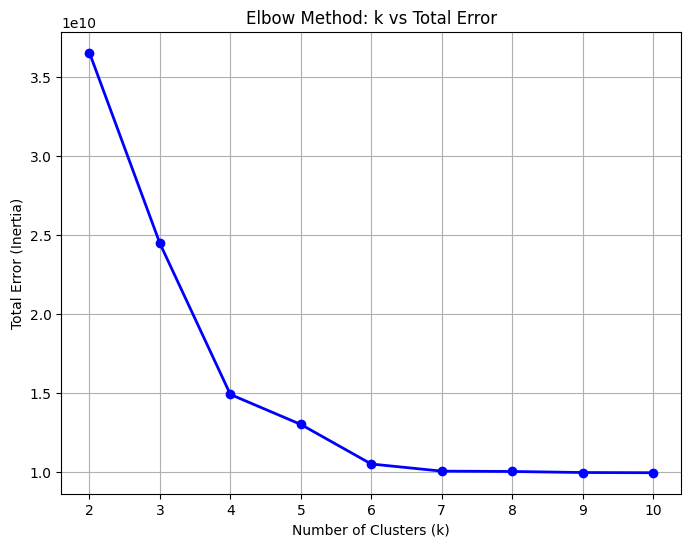

In [8]:
# 8.Visualize elbow method results
plt.figure(figsize=(8,6))
plt.plot(K, errors, 'bo-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Error (Inertia)')
plt.title('Elbow Method: k vs Total Error')
plt.grid(True)
plt.show()

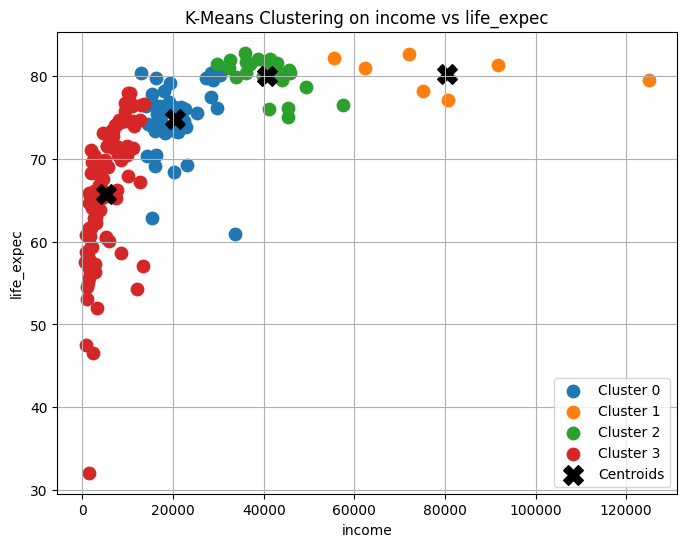

Silhouette score is 0.5923804015471303


In [9]:
# 9.Visualize clusters for income vs life_expectancy
k = 4
km = KMeansScratch(n_clusters=k, max_iters=200)
km.fit(X)

feature_x = 'income'
feature_y = 'life_expec'

x_idx = X.columns.get_loc(feature_x)
y_idx = X.columns.get_loc(feature_y)

plt.figure(figsize=(8, 6))
for cluster in range(k):
    points = X[km.labels_ == cluster]
    plt.scatter(points.iloc[:, x_idx], points.iloc[:, y_idx], label=f'Cluster {cluster}', s=80)

plt.scatter(km.centroids[:, x_idx], km.centroids[:, y_idx],
            c='black', marker='X', s=200, label='Centroids')

plt.title(f'K-Means Clustering on {feature_x} vs {feature_y}')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.grid(True)
plt.show()
print(f"Silhouette score is {silhouette_score(X,km.labels_)}")